In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

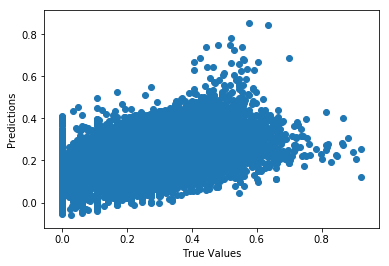

[ -7.98774648e-04  -8.96454010e-04   4.09978914e-03   2.58707061e-03
   2.78842609e-03  -2.99328630e-03  -5.29397511e-05   2.50721939e-04
  -1.16679808e-04   8.53732566e-04   8.06173403e-04  -3.51538039e-04
  -3.54866141e-04   3.03064611e-05   7.22327827e-03  -1.62762359e-03
   2.49753331e-02   1.34073564e-01  -1.00347180e+02  -5.31177762e+00
  -4.67818386e+03   2.26793170e+03  -6.31640034e-02   6.50967179e-01
  -2.07404555e-05   2.67467292e-05  -9.70926353e-02   1.56601599e-01
   2.08442890e+02  -1.85241125e+00   1.85587139e-01  -2.26774276e-01
  -1.30824600e-02  -1.31042722e-03  -9.32784141e-04]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.37675041  0.37035274  0.38300688  0.3923867 ]


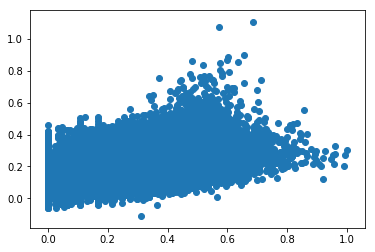

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.380933549049


In [9]:
print(lm.coef_)

[ -7.98774648e-04  -8.96454010e-04   4.09978914e-03   2.58707061e-03
   2.78842609e-03  -2.99328630e-03  -5.29397511e-05   2.50721939e-04
  -1.16679808e-04   8.53732566e-04   8.06173403e-04  -3.51538039e-04
  -3.54866141e-04   3.03064611e-05   7.22327827e-03  -1.62762359e-03
   2.49753331e-02   1.34073564e-01  -1.00347180e+02  -5.31177762e+00
  -4.67818386e+03   2.26793170e+03  -6.31640034e-02   6.50967179e-01
  -2.07404555e-05   2.67467292e-05  -9.70926353e-02   1.56601599e-01
   2.08442890e+02  -1.85241125e+00   1.85587139e-01  -2.26774276e-01
  -1.30824600e-02  -1.31042722e-03  -9.32784141e-04]
